In [1]:
#Bibliotecas
import os
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from pandas.core.reshape.merge import merge
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from IPython.display import display, Markdown

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)
pd.set_option('display.width', 800)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
#Funções auxiliares

def sum_billion(x):    
    return round(((x.sum())/1000000000.0),2)

def sum_million(x):    
    return round(((x.sum())/1000000.0),2)

def media_agregada(x):    
    return round(((x.sum())/12.0),0)

## Leitura dos dados

In [3]:
#Caminho da pasta com as bases de dados 
path = r'D:\TCC\TCC\codigos\preparacao_dados\analise_agrupadas\visao_geral_tratada'

#Leitura das Bases de Dados
text_files = [f for f in os.listdir(path) if f.endswith(".csv")] #Lista com todos os nomes dos arquivos csv contidos na pasta

ans_tratada = pd.concat([pd.read_csv(path+'\\'+f, sep=';', decimal= ',', encoding='mbcs') for f in text_files]) #Leitura e concatenação de todas as bases

ans_tratada['ano'] = ans_tratada['ano'].astype('str')

ans_tratada['ano'] = pd.PeriodIndex(ans_tratada['ano'], freq="Y")

ans_tratada['cd_ops'] = ans_tratada['cd_ops'].astype('str')

ans_tratada['trimestre'] = pd.PeriodIndex(ans_tratada['trimestre'], freq="Q")

ans_tratada.reset_index(drop=True, inplace=True)

ans_tratada


,ano,cd_ops,trimestre,receita,despesa,benef,modalidade,port_ops,contratacao
0,2018,303976,2018Q1,29314392.257,23298026.978,27209.000,Cooperativa Médica,Grande,Adesao
1,2018,342084,2018Q1,100884002.783,71227129.017,50901.000,Cooperativa Médica,Grande,Adesao
2,2018,348295,2018Q2,4388045.611,4255788.457,6692.000,Cooperativa Médica,Grande,Adesao
3,2018,348295,2018Q3,4596013.001,4967336.847,6736.000,Cooperativa Médica,Grande,Adesao
4,2018,348295,2018Q4,4842097.207,3878879.670,7581.000,Cooperativa Médica,Grande,Adesao
...,...,...,...,...,...,...,...,...,...
24089,2020,884,2020Q4,468803.060,26456443.450,66.000,Seguradora,Pequeno,Individual
24090,2021,884,2021Q1,489740.570,6408902.090,64.000,Seguradora,Pequeno,Individual
24091,2021,884,2021Q2,512590.700,7828274.480,63.000,Seguradora,Pequeno,Individual
24092,2021,884,2021Q3,495429.070,7919663.050,62.000,Seguradora,Pequeno,Individual


In [4]:
ans_tratada_resumo = ans_tratada.groupby(['contratacao','port_ops','modalidade','ano'], as_index=False).agg({    'cd_ops':lambda x: x.nunique(),
                                                                                                                'benef': 'sum',
                                                                                                                'receita':lambda x: sum_million(x),
                                                                                                                'despesa':lambda x: sum_million(x)})

ans_tratada_resumo = ans_tratada_resumo.sort_values(by=['contratacao','port_ops','cd_ops','ano','benef'],ascending=[True,True,False,True,False] ,ignore_index=True)

ans_tratada_resumo = ans_tratada_resumo.pivot(index = ['contratacao','port_ops','modalidade'], columns='ano', values=['cd_ops','benef','receita','despesa'])

ans_tratada_resumo = pd.DataFrame(ans_tratada_resumo.to_records())

ans_tratada_resumo = ans_tratada_resumo.rename({    ans_tratada_resumo.columns[3]:'n_ops_2018',
                                                    ans_tratada_resumo.columns[4]:'n_ops_2019',
                                                    ans_tratada_resumo.columns[5]:'n_ops_2020',
                                                    ans_tratada_resumo.columns[6]:'n_ops_2021',
                                                    ans_tratada_resumo.columns[7]:'benef_2018',
                                                    ans_tratada_resumo.columns[8]:'benef_2019',
                                                    ans_tratada_resumo.columns[9]:'benef_2020',
                                                    ans_tratada_resumo.columns[10]:'benef_2021',
                                                    ans_tratada_resumo.columns[11]:'receita_2018',
                                                    ans_tratada_resumo.columns[12]:'receita_2019',
                                                    ans_tratada_resumo.columns[13]:'receita_2020',
                                                    ans_tratada_resumo.columns[14]:'receita_2021',
                                                    ans_tratada_resumo.columns[15]:'despesa_2018',
                                                    ans_tratada_resumo.columns[16]:'despesa_2019',
                                                    ans_tratada_resumo.columns[17]:'despesa_2020',
                                                    ans_tratada_resumo.columns[18]:'despesa_2021'}, axis=1)

display(ans_tratada_resumo.head())

ans_tratada_resumo.to_csv('ans_tratada_resumo.csv',sep=';', index=False, encoding='mbcs', decimal=',')

,contratacao,port_ops,modalidade,n_ops_2018,n_ops_2019,n_ops_2020,n_ops_2021,benef_2018,benef_2019,benef_2020,benef_2021,receita_2018,receita_2019,receita_2020,receita_2021,despesa_2018,despesa_2019,despesa_2020,despesa_2021
0,Adesao,Grande,Cooperativa Médica,38.000,38.000,39.000,39.000,6694704.000,6922132.000,7630374.000,7818879.000,8987.200,10028.450,11358.050,12710.670,6323.090,7884.700,8463.880,10433.560
1,Adesao,Grande,Filantropia,2.000,2.000,2.000,2.000,93903.000,84816.000,73888.000,64711.000,60.800,62.150,60.230,56.800,44.500,47.450,39.120,43.780
2,Adesao,Grande,Medicina de Grupo,19.000,23.000,24.000,25.000,2956123.000,3245055.000,3684012.000,4015226.000,3105.570,3499.020,3372.510,4109.440,5034.790,3061.310,2083.800,3186.070
3,Adesao,Grande,Seguradora,3.000,3.000,3.000,3.000,1926169.000,1849534.000,1754961.000,1622277.000,5829.400,6247.220,6478.140,6237.290,4881.050,5331.520,5001.750,5686.990
4,Adesao,Médio,Autogestão,12.000,12.000,12.000,12.000,694109.000,661084.000,630978.000,617664.000,1255.800,1479.900,1455.710,1526.400,1151.480,1287.850,1108.630,1348.150


In [5]:
ans_tratada_agrup = ans_tratada.groupby(['ano','trimestre'], as_index=False).agg({  'receita':lambda x: sum_billion(x),
                                                                                    'despesa':lambda x: sum_billion(x),
                                                                                    'benef': 'sum',
                                                                                    'cd_ops':lambda x: x.nunique()})

ans_tratada_agrup['pct_despesa'] = ans_tratada_agrup.apply(lambda x: (x['despesa']/x['receita'])*100 , axis = 1).round(2)

ans_tratada_agrup.columns = ['ano','trimestre','receita','despesa','benef','n_ops','pct_despesa']

ans_tratada_agrup = ans_tratada_agrup[['trimestre','receita','despesa','benef','n_ops','pct_despesa']]

ans_tratada_agrup[['n_ops','benef']] = ans_tratada_agrup[['n_ops','benef']].astype('int')

ans_tratada_agrup['trimestre'] = pd.PeriodIndex(ans_tratada_agrup['trimestre'], freq="Q")

ans_tratada_agrup.set_index('trimestre', inplace=True)

ans_tratada_agrup

,receita,despesa,benef,n_ops,pct_despesa
trimestre,,,,,
2018Q1,45.850,34.470,39542420,596,75.180
2018Q2,46.760,37.460,39859445,596,80.110
2018Q3,48.980,41.320,39977329,596,84.360
2018Q4,53.910,40.850,40112340,596,75.770
2019Q1,50.500,38.800,40845543,612,76.830
2019Q2,51.750,42.600,41230217,612,82.320
2019Q3,53.100,43.790,41447988,612,82.470
2019Q4,54.610,43.890,41645051,612,80.370
2020Q1,55.320,41.930,42374528,624,75.800


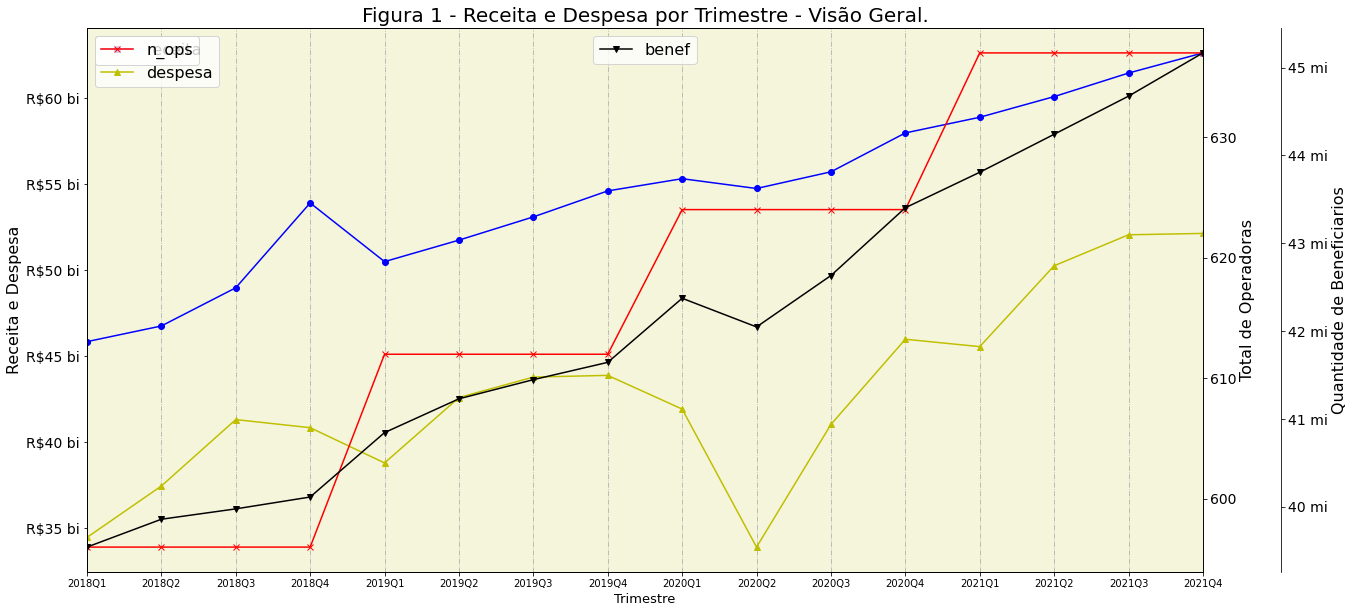

In [6]:
df_plot = ans_tratada_agrup.copy()

fig,ax1 = plt.subplots()

df_plot.plot(y=['receita','despesa'],figsize=(20, 10), style=['bo-','y^-'], ax=ax1)
ax1.set_title('Figura 1 - Receita e Despesa por Trimestre - Visão Geral.',fontsize = 20)
ax1.set_xticks(df_plot.index)
ax1.set_xticklabels(df_plot.index)
ax1.set_xlabel('Trimestre', fontsize = 13)
yticks = ax1.get_yticks()
ax1.set_yticklabels(['R${:.0f} bi'.format(x) for x in yticks], fontsize = 14)
ax1.set_ylabel('Receita e Despesa', fontsize=16)
ax1.legend(loc = 'upper left', fontsize = 16)
ax1.set_facecolor("beige")
ax1.grid(linestyle='-.', axis='x')

ax2 = ax1.twinx()

df_plot.plot(y=['n_ops'], figsize=(20,10), style=['rx-'], ax=ax2)
ax2.set_xticks(df_plot.index)
ax2.set_xticklabels(df_plot.index)
ax2.set_xlabel('Trimestre', fontsize = 13)
yticks = ax2.get_yticks()
ax2.set_yticklabels(yticks.astype('int'), fontsize = 14)
ax2.set_ylabel('Total de Operadoras', fontsize=16)
ax2.legend(loc = 'best', fontsize = 16)

ax3 = ax1.twinx()

ax3.spines.right.set_position(("axes", 1.07))

df_plot.plot(y=['benef'], figsize=(20,10), style=['kv-'], ax=ax3)
ax3.set_xticks(df_plot.index)
ax3.set_xticklabels(df_plot.index)
ax3.set_xlabel('Trimestre', fontsize = 13)
yticks = ax3.get_yticks()
ax3.set_yticklabels(['{:.0f} mi'.format(x/1e6) for x in yticks], fontsize = 14)
ax3.set_ylabel('Quantidade de Beneficiarios', fontsize=16)
ax3.legend(loc = 'upper center', fontsize = 16)

plt.savefig('visao_geral_tratada.png',
 bbox_inches="tight",
 pad_inches=1,
 facecolor='w')

plt.show()

In [7]:
#Cria o rankin das operadoras com maior receita e despesa
ans_tratada_agrup_ops = ans_tratada.groupby(['ano','cd_ops','trimestre'], as_index=False).agg({ 'receita':lambda x: sum_billion(x),
                                                                                                'despesa':lambda x: sum_billion(x)})

ans_tratada_agrup_ops.sort_values(by=['ano','receita'], ascending=[True,False], inplace=True)

ans_tratada_agrup_ops.head()

,ano,cd_ops,trimestre,receita,despesa
2367,2018,5711,2018Q4,5.350,4.520
2366,2018,5711,2018Q3,5.190,4.530
2365,2018,5711,2018Q2,5.080,4.520
2364,2018,5711,2018Q1,4.920,4.020
615,2018,326305,2018Q4,4.860,4.080


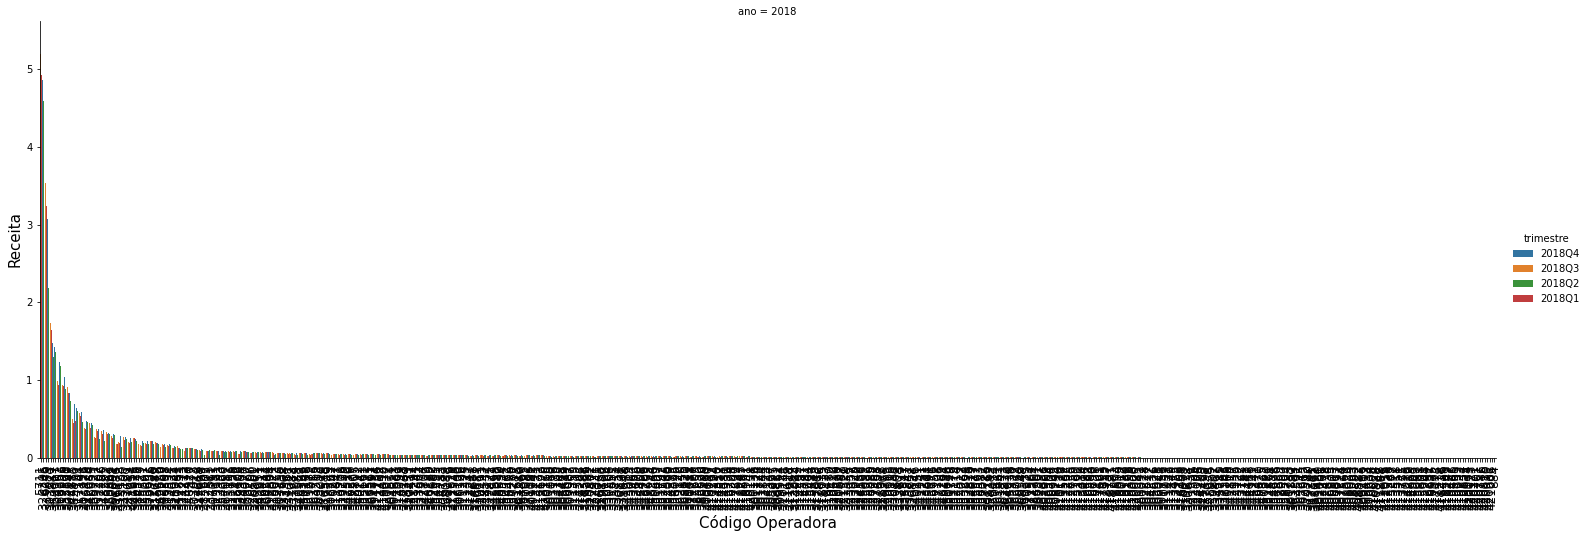

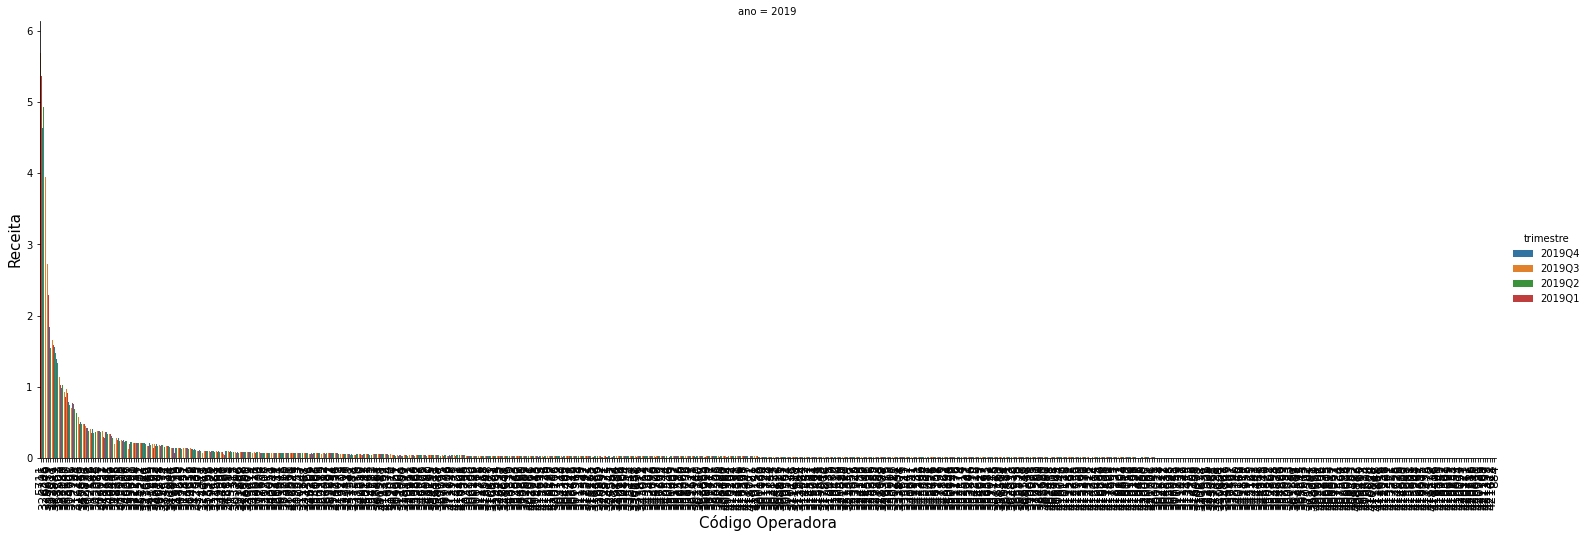

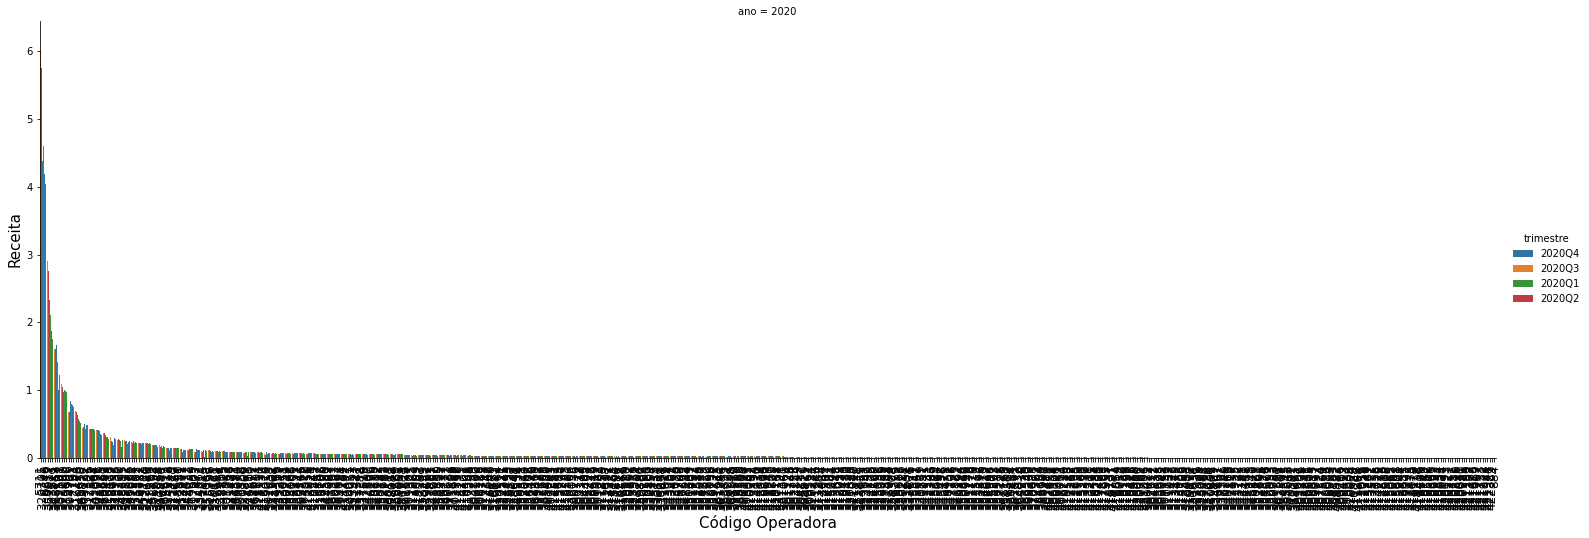

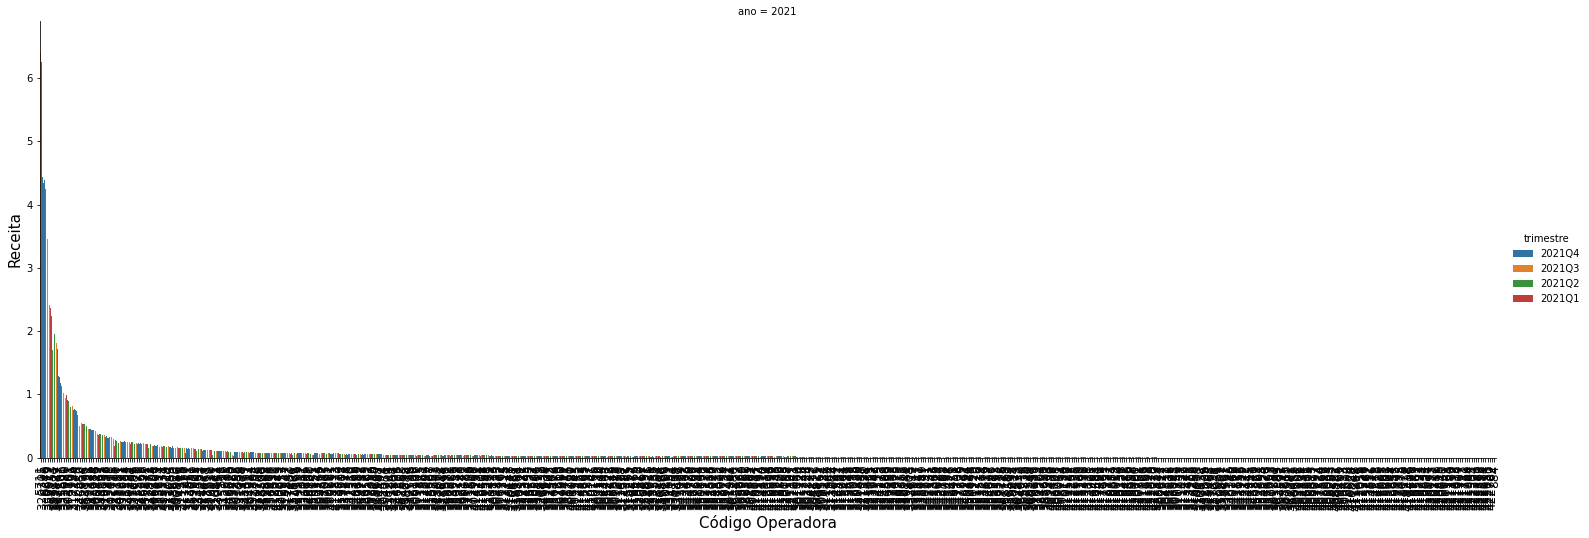

In [8]:
df_plot = ans_tratada_agrup_ops.copy()

fig, ax = plt.subplots(4)

ax[0] = sns.catplot(x='cd_ops', y='receita', hue='trimestre', data = df_plot[df_plot['ano'] == '2018'], kind='bar', col='ano', height=7, aspect=3)
ax[1] = sns.catplot(x='cd_ops', y='receita', hue='trimestre', data = df_plot[df_plot['ano'] == '2019'], kind='bar', col='ano', height=7, aspect=3)
ax[2] = sns.catplot(x='cd_ops', y='receita', hue='trimestre', data = df_plot[df_plot['ano'] == '2020'], kind='bar', col='ano', height=7, aspect=3)
ax[3] = sns.catplot(x='cd_ops', y='receita', hue='trimestre', data = df_plot[df_plot['ano'] == '2021'], kind='bar', col='ano', height=7, aspect=3)

ax[0].set_xticklabels(rotation = 90, fontsize= 12)
ax[0].set_xlabels('Código Operadora', fontsize=15)
ax[0].set_ylabels('Receita', fontsize= 15)

ax[1].set_xticklabels(rotation = 90, fontsize= 12)
ax[1].set_xlabels('Código Operadora', fontsize=15)
ax[1].set_ylabels('Receita', fontsize= 15)

ax[2].set_xticklabels(rotation = 90, fontsize= 12)
ax[2].set_xlabels('Código Operadora', fontsize=15)
ax[2].set_ylabels('Receita', fontsize= 15)

ax[3].set_xticklabels(rotation = 90, fontsize= 12)
ax[3].set_xlabels('Código Operadora', fontsize=15)
ax[3].set_ylabels('Receita', fontsize= 15)

fig.tight_layout()

plt.close(1)
fig.show()

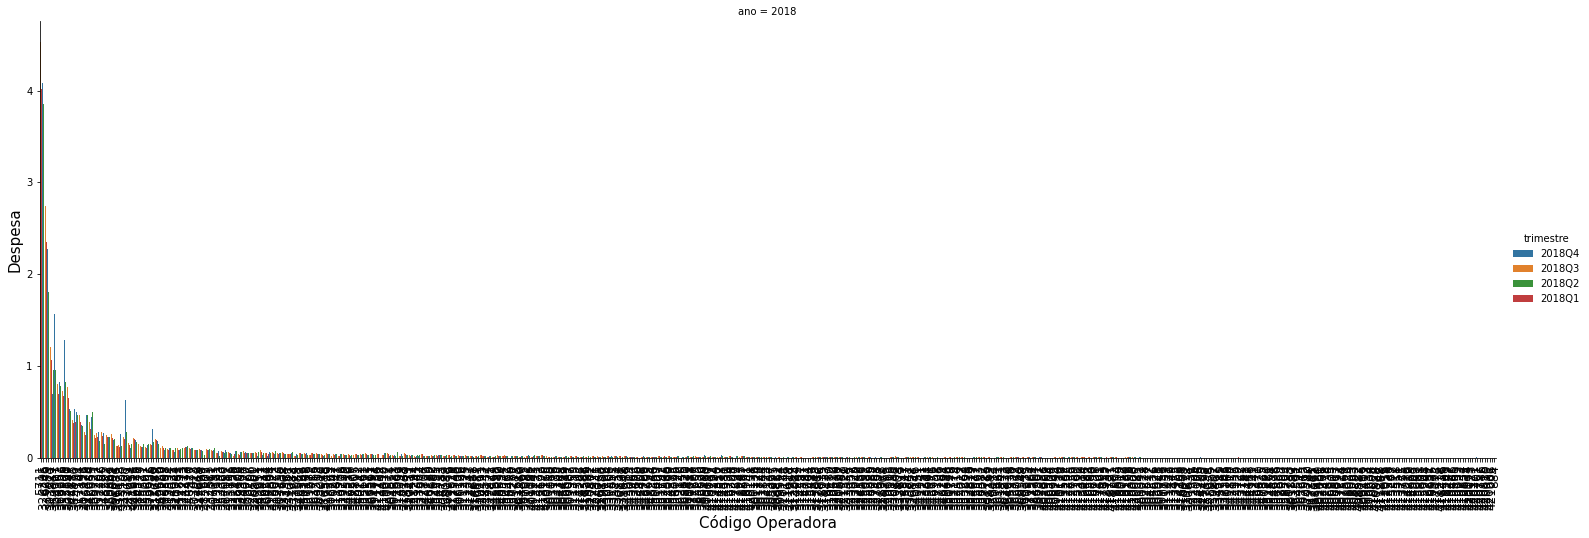

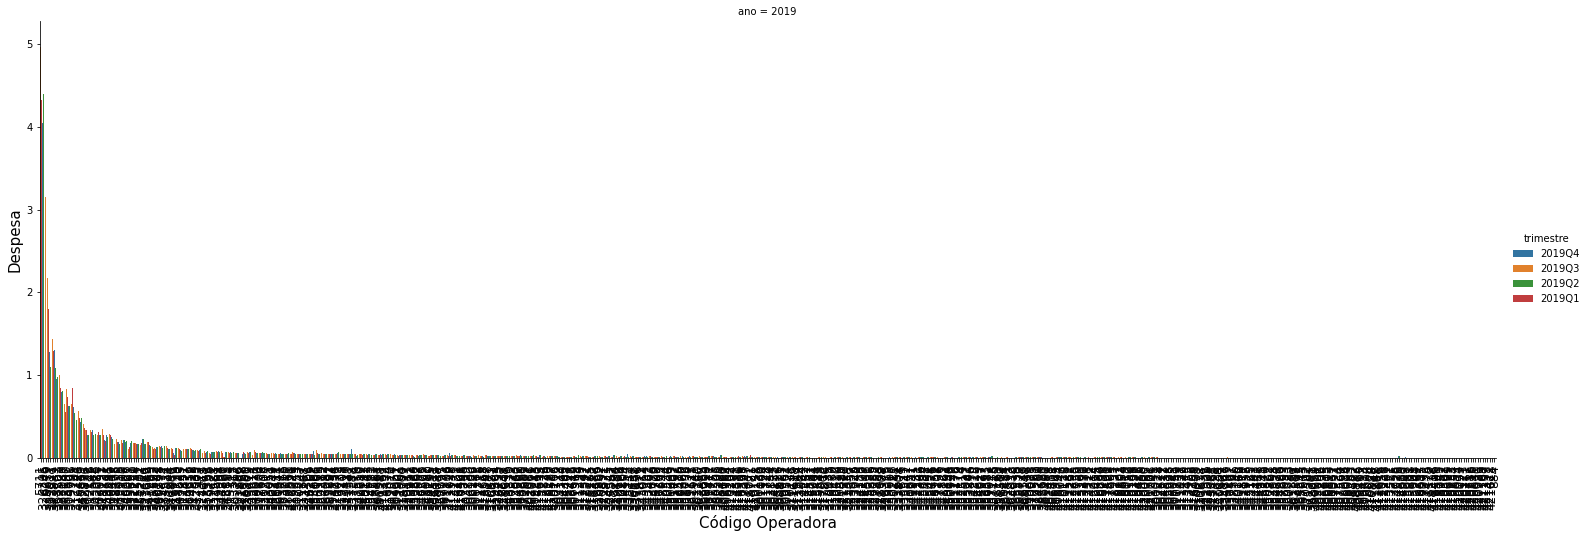

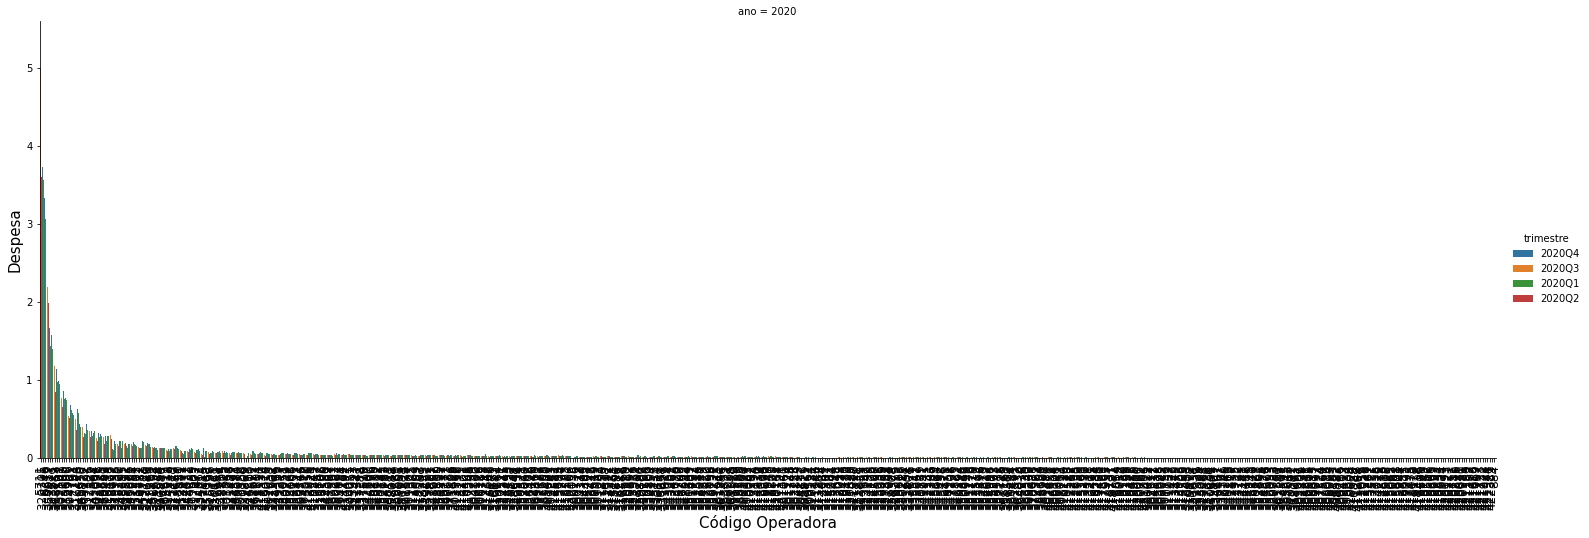

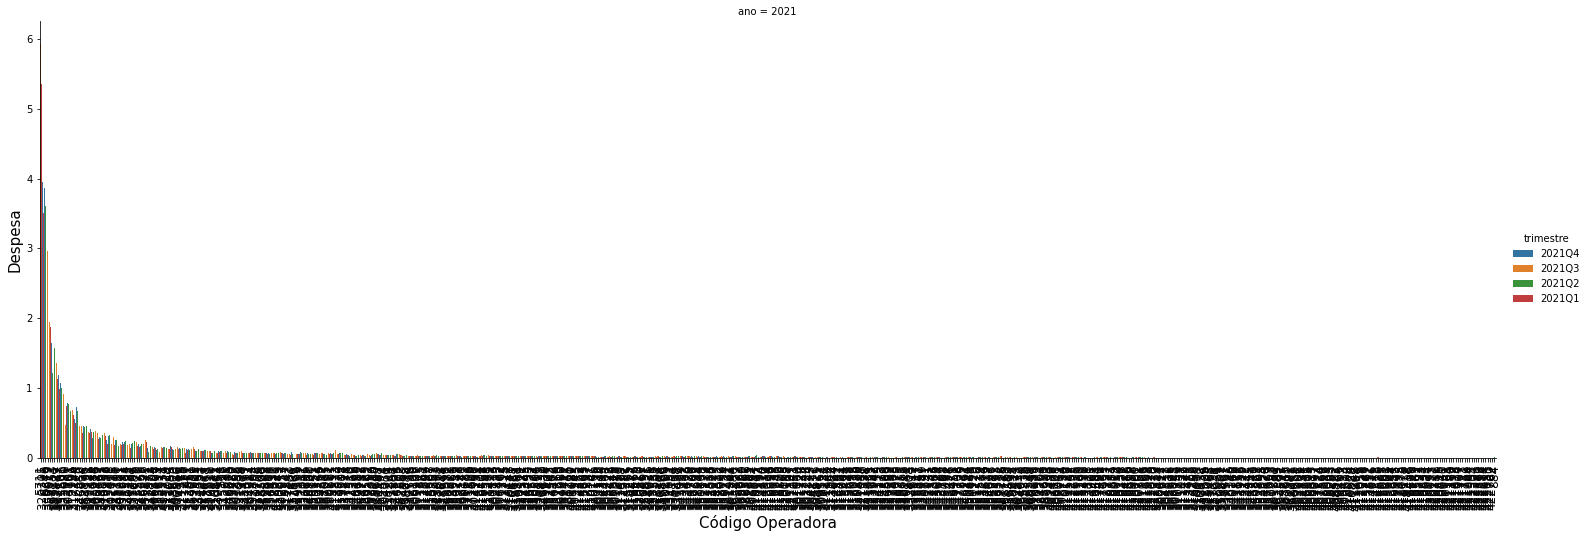

In [9]:
df_plot = ans_tratada_agrup_ops.copy()

fig, ax = plt.subplots(4)

ax[0] = sns.catplot(x='cd_ops', y='despesa', hue='trimestre', data = df_plot[df_plot['ano'] == '2018'], kind='bar', col='ano', height=7, aspect=3)
ax[1] = sns.catplot(x='cd_ops', y='despesa', hue='trimestre', data = df_plot[df_plot['ano'] == '2019'], kind='bar', col='ano', height=7, aspect=3)
ax[2] = sns.catplot(x='cd_ops', y='despesa', hue='trimestre', data = df_plot[df_plot['ano'] == '2020'], kind='bar', col='ano', height=7, aspect=3)
ax[3] = sns.catplot(x='cd_ops', y='despesa', hue='trimestre', data = df_plot[df_plot['ano'] == '2021'], kind='bar', col='ano', height=7, aspect=3)

ax[0].set_xticklabels(rotation = 90, fontsize= 12)
ax[0].set_xlabels('Código Operadora', fontsize=15)
ax[0].set_ylabels('Despesa', fontsize= 15)

ax[1].set_xticklabels(rotation = 90, fontsize= 12)
ax[1].set_xlabels('Código Operadora', fontsize=15)
ax[1].set_ylabels('Despesa', fontsize= 15)

ax[2].set_xticklabels(rotation = 90, fontsize= 12)
ax[2].set_xlabels('Código Operadora', fontsize=15)
ax[2].set_ylabels('Despesa', fontsize= 15)

ax[3].set_xticklabels(rotation = 90, fontsize= 12)
ax[3].set_xlabels('Código Operadora', fontsize=15)
ax[3].set_ylabels('Despesa', fontsize= 15)

fig.tight_layout()

plt.close(1)
fig.show()